<a href="https://colab.research.google.com/github/veeralipi22/Assignments-Forecasting/blob/main/Assignments_Forecasting_CocaCola_Rawdata_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##importing the required libraries for Analysis

import pandas as pd
import numpy as np
from numpy import sqrt

from pandas import Grouper
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.seasonal import seasonal_decompose
## with the help of this we will be able to creat graphs for the dfferent components of time series data
#like trends, level, sesional components and residual data

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
##Loading the dataset
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0,parse_dates=True)

In [3]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
df.set_index('Quarter',inplace=True)
## making the Quarter column as index
df


,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [8]:
df.isnull().sum().sum()
## no nan values in the data set


0

In [9]:
df[df.duplicated()].shape
#found the 16 duplicated rows

(0, 1)

In [10]:
df[df.duplicated()]


,Sales
Quarter,


In [11]:
df.drop_duplicates(inplace=True)
## removed the duplicated

In [12]:
df

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [13]:
DF = df.copy()
## copied the data from df to DF so that any changes done to coppied data does not reflect to original data
DF

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [14]:
DF.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [15]:
DF.ndim


2

In [16]:
DF.isnull().sum().sum()


0

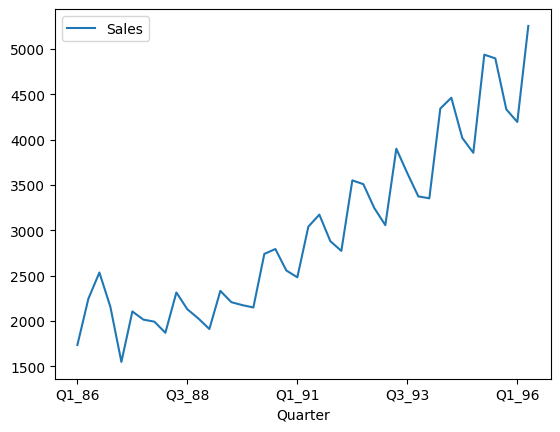

In [17]:
## Visualization of Data Checking the line plot,Histogram and Density Plots,create a density plot,
## Box and Whisker Plots by Interval,Lag Plot, Autocorrelation Plot
DF.plot()
plt.show()

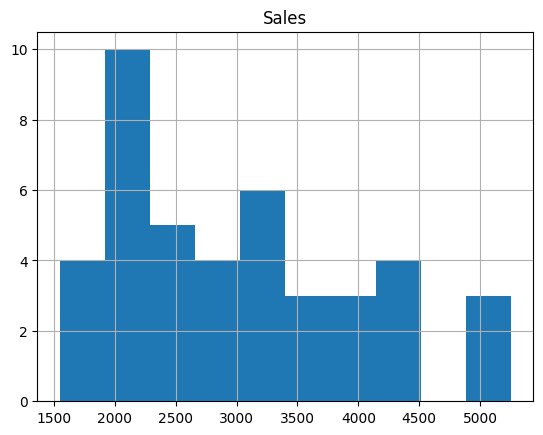

In [18]:
## here we can say that the trend is upward and the sessionality is multiplicative
##Histogram and Density Plots

DF.hist()
plt.show()

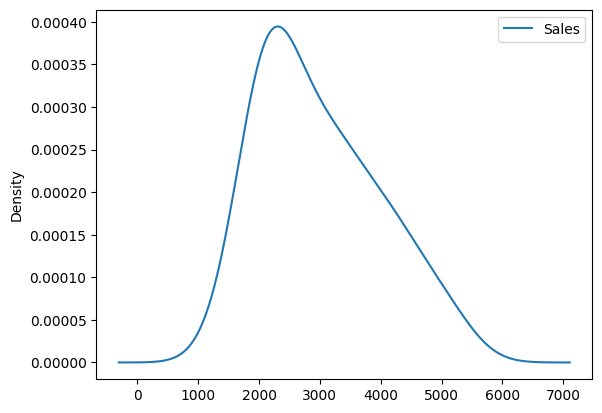

In [19]:
# create a density plot
DF.plot(kind='kde')
plt.show()

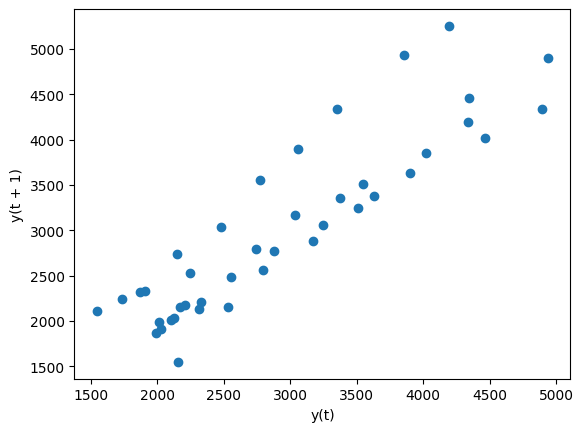

In [20]:
##Lag_plot
lag_plot(DF)
plt.show()


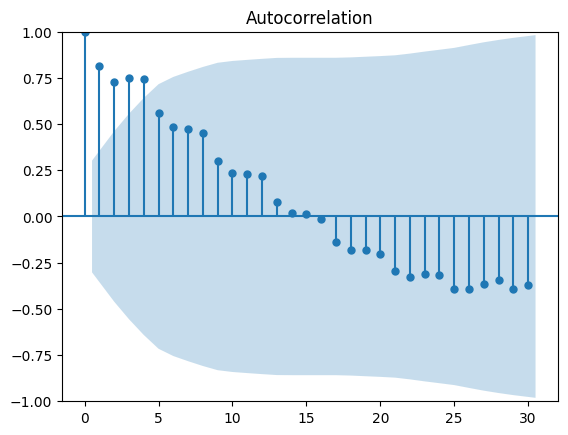

In [21]:
#Autocorrelation Plot

plot_acf(DF,lags=30)
plt.show()

# Square Root Transform

In [22]:
dataframe = DataFrame(DF.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = sqrt(dataframe['Sales'])

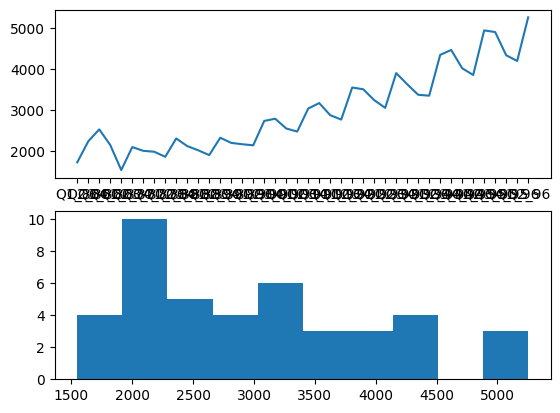

In [23]:
# line plot
plt.subplot(211)
plt.plot(DF['Sales'])
# histogram
plt.subplot(212)
plt.hist(DF['Sales'])
plt.show()